In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [ ]:
# Makes sure this file has an access to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#When running this code, please adjust the file path to match the location of your file






In [ ]:
# Defining the file path
file_path = '/content/drive/My Drive/Colab Notebooks/Ethereum/original_ethereum_data.csv'

# Reading the CSV file
ethereum_data = pd.read_csv(file_path)

In [ ]:
#Displaying the first 5 observations
ethereum_data.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
#Getting the information about the data
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [ ]:
# Renameing the 'FLAG' column to 'isFraud'
ethereum_data.rename(columns={'FLAG': 'isFraud'}, inplace=True)
# Removing leading spaces from some column names
ethereum_data.columns = [col.lstrip() for col in ethereum_data.columns]

In [ ]:
#Getting the information about the data
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   isFraud                                               9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

In [ ]:
#Removing first two columns of etheruem data, namely "Unnamed: 0" and "Index", because they are not meaningful
ethereum_data.drop(ethereum_data.columns[[0, 1]], axis=1, inplace=True)

In [ ]:
#Displaying the first 5 observations
ethereum_data.head()

,Address,isFraud,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [ ]:
#Displaying categorical variables
categorical_vars = ethereum_data.select_dtypes(include=['object'])
categorical_vars

,Address,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,NaN,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,StatusNetwork,EOS
...,...,...,...
9836,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,,GSENetwork
9837,0xff718805bb9199ebf024ab6acd333e603ad77c85,,Blockwell say NOTSAFU
9838,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,,Free BOB Tokens - BobsRepair.com
9839,0xffde23396d57e10abf58bd929bb1e856c7718218,NaN,NaN


In [ ]:
#Finding the number of unique values for each categorical variable
for var in categorical_vars:
    print(f"Number of unique values in {var}: {ethereum_data[var].nunique()}")

Number of unique values in Address: 9816
Number of unique values in ERC20 most sent token type: 304
Number of unique values in ERC20_most_rec_token_type: 466


In [ ]:
# Filteing the dataset for fraudulent transactions
fraud_data = ethereum_data[ethereum_data['isFraud'] == 1]

# Counting the occurrences of each address in fraudulent transactions
address_counts = fraud_data['Address'].value_counts()

# Identifying addresses that appear more than once in fraudulent transactions
repeated_addresses = address_counts[address_counts > 1]

# Printing the repeated addresses
print("Addresses that participated in fraudulent transactions more than once:")
print(repeated_addresses)

Addresses that participated in fraudulent transactions more than once:
Series([], Name: count, dtype: int64)


In [ ]:
#Removing "Address" column, because almost all entries are unique and there is not any address participated in fraudulent transactions more than once
#Therefore, this column unnecassary for further analysis
ethereum_data.drop("Address", axis=1, inplace=True)

In [ ]:
# Function to check tokens in 'ERC20 most sent token type' and 'ERC20_most_rec_token_type" partipated in fradulent transactions at least 1 time
def check_categories(data, categorical_vars):
    for var in categorical_vars:
        value_counts = data[var].value_counts()
        frequent_categories = value_counts[value_counts >= 1]

        print(f"Categorical variable '{var}' with categories appearing at least once in fraud cases:")
        for category, count in frequent_categories.items():
            print(f"Category '{category}': {count} times")
        print("\n")

# List of remaining categorical variables
categorical_vars = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']

# Checking the categories
check_categories(fraud_data, categorical_vars)

Categorical variable 'ERC20 most sent token type' with categories appearing at least once in fraud cases:
Category ' ': 1191 times
Category 'blockwell.ai KYC Casper Token': 33 times
Category 'Tronix': 14 times
Category 'OmiseGO': 7 times
Category 'VeChain': 5 times
Category 'TenXPay': 5 times
Category 'Golem': 4 times
Category 'ERC20': 3 times
Category 'EOS': 3 times
Category 'AdEx': 3 times
Category 'Livepeer Token': 3 times
Category 'XENON': 3 times
Category 'Dao.Casino': 2 times
Category 'PRG': 2 times
Category 'BizCoin': 2 times
Category 'OCoin': 2 times
Category 'Pundi X Token': 2 times
Category 'StatusNetwork': 2 times
Category 'DATAcoin': 2 times
Category 'Populous': 2 times
Category 'FunFair': 2 times
Category 'MCAP': 2 times
Category 'Lucky Token': 1 times
Category 'VIU': 1 times
Category 'CoinDash': 1 times
Category 'SONM': 1 times
Category '''': 1 times
Category 'SCAM Seal Token': 1 times
Category 'Litecoin One': 1 times
Category 'AION': 1 times
Category 'Synthetix Network T

In [ ]:
# Identifing tokens involved in fraud at least once
fraudulent_tokens = set()
for var in categorical_vars:
    tokens_in_fraud = fraud_data[var].dropna().unique()
    fraudulent_tokens.update(tokens_in_fraud)

print(f"Fraudulent tokens: {fraudulent_tokens}")

Fraudulent tokens: {'AICRYPTO', 'ROOMDAO COIN (RDC)', 'WaBi', 'Promodl', 'Titanium BAR Token', 'Hydro', 'VIU', 'Cashaa', 'BizCoin', 'ArtisTurba', 'BUZCOIN', 'Olive', 'EOS', 'ICTA', 'SCAM Seal Token', 'DADI', 'NucleusVision', 'DIGIBYTE', 'UnikoinGold', 'ABCC invite', 'SONM', 'Penis', 'OPTin Token', 'Bounty0x', 'Merculet', 'IUNGO', 'Storj', 'VeChain', 'A2A(B) STeX Exchange Token', 'Amplify', 'Bulleon Promo Token', 'Vezt', 'Ponder Airdrop Token', 'Ethos', 'BinaryCoin', 'ARBITRAGE', 'Monetha', 'IDICE', 'Synthetix Network Token', 'QKC', 'OmiseGO', 'Gifto', 'Jolly Boots', 'USD Coin', 'CosmoCoin', 'Blackmoon Crypto Token', 'LendConnect', 'Raiden', 'FunFair', 'BAT', "''", 'MobileGo', 'Pundi X Token', 'An Etheal Promo', 'Fantom Token', 'EMO tokens', 'Crypto.com', 'Piggies', 'BAX', 'INS Promo1', 'Litecoin One', 'StatusNetwork', 'Magna', 'Feed', 'ERC20', 'RvT', ' ', 'Lendroid Support Token', 'Bounty', 'POWERBANK', 'Electronic Energy Coin', 'Hash Power Token', 'EtherEcash', 'Metal', 'CyberMiles', 

In [ ]:
# Function to create the binary column to check whether the transactions owner recived or sent any token which have been partipated in fraudlent transaction
def create_fraud_token_indicator(data, categorical_vars, fraudulent_tokens):
    data['involved_fraudulent_token'] = 0
    for var in categorical_vars:
        data['involved_fraudulent_token'] = data['involved_fraudulent_token'] | data[var].apply(lambda x: 1 if x in fraudulent_tokens and pd.notna(x) and x != 0 else 0)

# Applying the function to create the binary column
create_fraud_token_indicator(ethereum_data, categorical_vars, fraudulent_tokens)


In [ ]:
#Displaying the first 5 observations
ethereum_data.head()

,isFraud,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type,involved_fraudulent_token
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,...,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire,1
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,...,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token,1
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,...,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON,1
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,...,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON,1
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,...,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS,1


In [ ]:
# List of remaining categorical variables
categorical_vars = ['ERC20 most sent token type', 'ERC20_most_rec_token_type']
# Removing categorical variables 'ERC20 most sent token type' and 'ERC20_most_rec_token_type' from the ethereum data because the information in this columns transformed
# to new feature 'involved_fraudulent_token'
ethereum_data.drop(categorical_vars, axis=1, inplace=True)

In [ ]:
#Rechecking the information about data
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 47 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   isFraud                                               9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

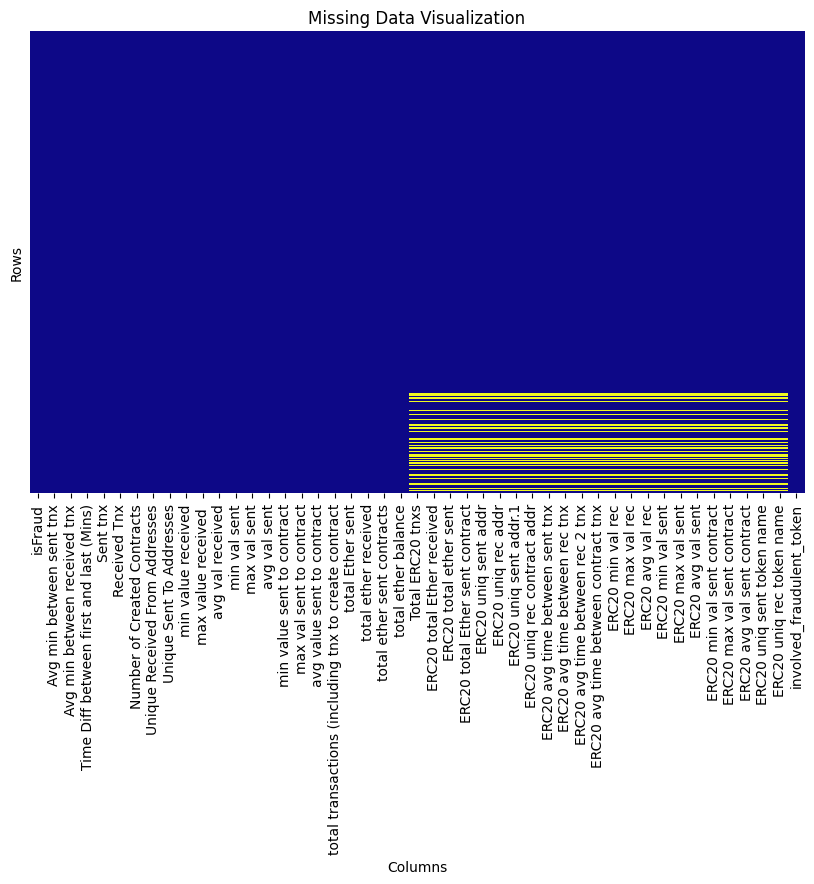

In [ ]:
#Visualazing the missing datas in the table if there is missing values
plt.figure(figsize=(10, 6))
sns.heatmap(ethereum_data.isnull(), yticklabels=False, cbar=False, cmap='plasma')

plt.title('Missing Data Visualization')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [ ]:
# Identifying columns with missing values
columns_with_missing_values = ethereum_data.columns[ethereum_data.isnull().any()].tolist()

# Calculating skewness for columns with missing values
skewness_values = ethereum_data[columns_with_missing_values].skew()

print("Skewness for columns with missing values:")
print(skewness_values)

# Calculating variance for columns with missing values
variance_values = ethereum_data[columns_with_missing_values].var()

print("Variance for columns with missing values:")
print(variance_values)

Skewness for columns with missing values:
Total ERC20 tnxs                       19.930233
ERC20 total Ether received             94.806604
ERC20 total ether sent                 94.786924
ERC20 total Ether sent contract        59.280265
ERC20 uniq sent addr                   40.648025
ERC20 uniq rec addr                    37.586021
ERC20 uniq sent addr.1                 23.720828
ERC20 uniq rec contract addr           16.330917
ERC20 avg time between sent tnx         0.000000
ERC20 avg time between rec tnx          0.000000
ERC20 avg time between rec 2 tnx        0.000000
ERC20 avg time between contract tnx     0.000000
ERC20 min val rec                      50.535806
ERC20 max val rec                      94.833841
ERC20 avg val rec                      71.026899
ERC20 min val sent                     94.882248
ERC20 max val sent                     94.904137
ERC20 avg val sent                     94.919941
ERC20 min val sent contract             0.000000
ERC20 max val sent contract

In [ ]:
# Checking for columns with zero variance whether all values are zeros/NaNs to drop them if all entries are zeros
columns_to_drop = []

for column in columns_with_missing_values:
    # Checking if all values are NaN or zero
    if ((ethereum_data[column] == 0) | (ethereum_data[column].isna())).all():
        columns_to_drop.append(column)
        print(f"Column '{column}' does not have any non-zero values and will be dropped.")

# Droping columns with all entries zero
if columns_to_drop:
    ethereum_data = ethereum_data.drop(columns=columns_to_drop)


Column 'ERC20 avg time between sent tnx' does not have any non-zero values and will be dropped.
Column 'ERC20 avg time between rec tnx' does not have any non-zero values and will be dropped.
Column 'ERC20 avg time between rec 2 tnx' does not have any non-zero values and will be dropped.
Column 'ERC20 avg time between contract tnx' does not have any non-zero values and will be dropped.
Column 'ERC20 min val sent contract' does not have any non-zero values and will be dropped.
Column 'ERC20 max val sent contract' does not have any non-zero values and will be dropped.
Column 'ERC20 avg val sent contract' does not have any non-zero values and will be dropped.


In [ ]:
#Rechecking the information about data
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   isFraud                                               9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [ ]:
# Filling the columns which have missing values with the median of their respective columns since those columns are highly right skeewed
ethereum_data_filled = ethereum_data.fillna(ethereum_data.median())
ethereum_data=ethereum_data_filled.copy()

In [ ]:
#Recheking the summary of the data
ethereum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   isFraud                                               9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

Number of non-fraudulent transactions: 7662
Number of fraudulent transactions: 2179
Imbalance Ratio (IR): 3.52


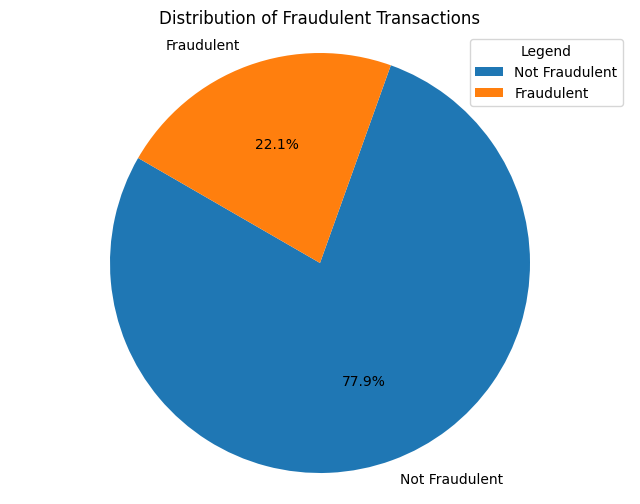

In [ ]:
# Counting the number of fraud and non-fraud instances
fraud_counts = ethereum_data['isFraud'].value_counts()
num_non_fraud = fraud_counts[0]
num_fraud = fraud_counts[1]

# Calculating the imbalance ratio (IR)
ir_ratio = num_non_fraud / num_fraud

# Printing the number of fraud and non-fraud instances and the IR ratio
print(f"Number of non-fraudulent transactions: {num_non_fraud}")
print(f"Number of fraudulent transactions: {num_fraud}")
print(f"Imbalance Ratio (IR): {ir_ratio:.2f}")

# Visualizing the percentage of fraudulent transactions in the data to see to what extent the data is imbalanced
plt.figure(figsize=(8, 6))
plt.pie(fraud_counts, labels=['Not Fraudulent', 'Fraudulent'], autopct='%1.1f%%', startangle=150)
plt.title('Distribution of Fraudulent Transactions')
plt.axis('equal')
plt.legend(loc='upper right', title='Legend')
plt.show()

In [ ]:
# Calculating Skewness
print("Skewness of each numerical feature:")
print(ethereum_data.skew())

# Calculating Kurtosis
print("\nKurtosis of each numerical feature:")
print(ethereum_data.kurtosis())

Skewness of each numerical feature:
isFraud                                                  1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                            

In [ ]:
# Defining thresholds for skewness and kurtosis
skewness_threshold = 1
kurtosis_threshold = 3

# Identifing columns with high skewness or kurtosis
high_skewness_columns = ethereum_data.skew().abs()[lambda x: x > skewness_threshold].index
high_kurtosis_columns = ethereum_data.kurtosis().abs()[lambda x: x > kurtosis_threshold].index

# Combine columns to transform (remove duplicates)
columns_to_transform = set(high_skewness_columns).union(set(high_kurtosis_columns))

# Identifing binary columns
binary_columns = [col for col in ethereum_data.columns if ethereum_data[col].nunique() == 2]

# Removing binary columns from columns to transform
columns_to_transform = columns_to_transform - set(binary_columns)

# Initializing the Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson')

# Applying Yeo-Johnson transformation to the identified columns
for column in columns_to_transform:
    # Reshape the data to fit the transformer
    data = ethereum_data[column].values.reshape(-1, 1)
    # Fit and transform the data
    ethereum_data[column] = pt.fit_transform(data)

# Print the columns that were transformed
print("Columns that were Yeo-Johnson transformed:")
print(columns_to_transform)

Columns that were Yeo-Johnson transformed:
{'total Ether sent', 'avg val sent', 'ERC20 min val sent', 'total ether sent contracts', 'min val sent', 'total ether balance', 'ERC20 uniq rec addr', 'ERC20 avg val sent', 'ERC20 min val rec', 'min value sent to contract', 'ERC20 max val sent', 'total ether received', 'Number of Created Contracts', 'ERC20 avg val rec', 'ERC20 uniq sent addr', 'Sent tnx', 'Avg min between received tnx', 'max value received ', 'ERC20 total Ether received', 'Time Diff between first and last (Mins)', 'avg value sent to contract', 'total transactions (including tnx to create contract', 'Avg min between sent tnx', 'ERC20 max val rec', 'ERC20 uniq sent token name', 'ERC20 uniq rec token name', 'Unique Sent To Addresses', 'max val sent to contract', 'ERC20 total ether sent', 'min value received', 'Received Tnx', 'ERC20 uniq rec contract addr', 'avg val received', 'max val sent', 'ERC20 uniq sent addr.1', 'ERC20 total Ether sent contract', 'Total ERC20 tnxs', 'Unique 

In [ ]:
# Defining the file path for saving the preprocessed data
preprocessed_file_path = '/content/drive/My Drive/Colab Notebooks/Ethereum/preprocessed_ethereum_data.csv'

# Saving the preprocessed DataFrame to a new CSV file
ethereum_data.to_csv(preprocessed_file_path, index=False)

print(f'Preprocessed data saved to {preprocessed_file_path}')

Preprocessed data saved to /content/drive/My Drive/Colab Notebooks/Ethereum/preprocessed_ethereum_data.csv
